In [1]:
# upload library yang diperlukan
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter

In [ ]:
# memanggil dataset dan lihat isi data
df = pd.read_csv('zomato/zomato.csv')
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [3]:
# melihat tipe data dalam dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [4]:
# mengecek apakah ada data duplicate
duplicates = df[df.duplicated()]
print(duplicates)


Empty DataFrame
Columns: [url, address, name, online_order, book_table, rate, votes, phone, location, rest_type, dish_liked, cuisines, approx_cost(for two people), reviews_list, menu_item, listed_in(type), listed_in(city)]
Index: []


In [5]:
# mengecek apakah ada data null
print(df.isnull().sum())

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64


Filling Nulls

In [ ]:
# mengubah tipe data rate dan convert ke float (menghilangkan /5, strip spaces, serta data yang bukan numerik)
df['rate'] = df['rate'].astype(str).str.extract(r'(\d+\.?\d*)')[0].astype(float)

#mengisi null values dengan median
df['rate'].fillna(df['rate'].median(), inplace=True)

In [ ]:
# menambahkan most frequent value ke kolom location, rest_type, cuisines, dan listed_in(city)
categorical_columns = ['location', 'rest_type', 'cuisines', 'listed_in(city)']
for col in categorical_columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [ ]:
# mengganti nilai null di dish_liked dengan 'Unknown' dan phone dengan 'not available'
df['dish_liked'].fillna('Unknown', inplace=True)
df['phone'].fillna('Not Available', inplace=True)

In [ ]:
# mengisi nilai null di harga 'approx_cost' dengan nilai median
df['votes'].fillna(df['votes'].median(), inplace=True)
df['approx_cost(for two people)'] = pd.to_numeric(df['approx_cost(for two people)'], errors='coerce')
df['approx_cost(for two people)'].fillna(df['approx_cost(for two people)'].median(), inplace=True)


In [10]:
# cek apakah masih ada data null
print(df.isnull().sum())

url                            0
address                        0
name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
phone                          0
location                       0
rest_type                      0
dish_liked                     0
cuisines                       0
approx_cost(for two people)    0
reviews_list                   0
menu_item                      0
listed_in(type)                0
listed_in(city)                0
dtype: int64


Melakukan analisa

1. Analisa Rating dan Review: Jenis restoran apa yang populer berdasarkan review? Apakah restoran dengan rating tinggi juga memiliki banyak ulasan?

In [ ]:
# Kelompokkan berdasarkan kota, hitung peringkat rata-rata & total ulasan
city_ratings = df.groupby('listed_in(city)').agg(
    avg_rating=('rate', 'mean'),
    total_reviews=('votes', 'sum')  # Asumsi 'votes' adalah jumlah ulasan
)

# Bulatkan peringkat ke 2 angka desimal
city_ratings['avg_rating'] = city_ratings['avg_rating'].round(2)

# Urutkan berdasarkan peringkat terlebih dahulu, lalu berdasarkan total ulasan (urutan menurun)
top_cities = city_ratings.sort_values(by=['avg_rating', 'total_reviews'], ascending=[False, False]).head(5)


In [ ]:
# Ubah 'rate' menjadi angka
df['rate'] = df['rate'].astype(str).str.extract(r'(\d+\.?\d*)')[0].astype(float)

# Kelompokkan berdasarkan kota dan hitung total ulasan & ulasan berbobot
city_ratings = df.groupby('listed_in(city)').agg(
    total_reviews=('votes', 'sum'),  # Sum of all reviews
    weighted_rating=('rate', lambda x: (x * df.loc[x.index, 'votes']).sum() / df.loc[x.index, 'votes'].sum() if df.loc[x.index, 'votes'].sum() > 0 else x.mean())  # Weighted avg
)

# Bulatkan peringkat ke 2 angka desimal
city_ratings['weighted_rating'] = city_ratings['weighted_rating'].round(2)

# Urutkan berdasarkan ulasan berbobot & total ulasan, ambil 5 teratas
top_weighted_cities = city_ratings.sort_values(by=['weighted_rating', 'total_reviews'], ascending=[False, False]).head(5)


In [ ]:
# Cetak hasil
print(top_cities)

# Cetak hasil
print(top_weighted_cities)

                 avg_rating  total_reviews
listed_in(city)                           
MG Road                3.79         722679
Church Street          3.79         687895
Brigade Road           3.78         648458
Residency Road         3.77         588107
Lavelle Road           3.76         583177
                       total_reviews  weighted_rating
listed_in(city)                                      
Koramangala 7th Block        1065901             4.24
Koramangala 5th Block        1040312             4.24
BTM                           985690             4.23
Koramangala 6th Block         978900             4.23
Church Street                 687895             4.23


Kita mendapatkan dua hasil yang berbeda, yaitu rating rata-rata (top_cities) dengan rating berdasarkan reviews (top_weighted_cities)

Jika kita mencari rating yang ada di kota tersebut (top_cities) maka metode average hanya menghitung berdasarkan rata-rata dari semua rating restoran di setiap kota tanpa menambahkan jumlah ulasan yang diterima restoran di kota tersebut, membuat kota dengan banyak restoran berperingkat rendah masih bisa memiliki rata-rata tinggi jika beberapa restoran memiliki rating yang sangat tinggi.

Kalau ditambahkan rating dengan review yang membobot (top_weighted_cities), maka rating di setiap restoran diberi bobot berdasarkan jumlah ulasan (votes) dan membuat restoran yang memiliki lebih banyak ulasan lebih berpengaruh terhadap peringkat kota dan memberikan hasil yang lebih baik karena menggunakan jumlah ulasan.

Jadi Avg Rating (Rating Rata-rata) lebih cocok jika ingin melihat persebaran kualitas restoran secara umum di tiap kota, sedangkan Weighted Rating (Rating Berbobot) lebih akurat untuk melihat kota dengan restoran berkualitas tinggi karena ulasan (reviews) dari banyak pelanggan.

2. Analisa Harga dan Biaya Makanan: Apakah harga yang lebih mahal berhubungan dengan rating lebih tinggi?

In [ ]:
# Pastikan kolom harga diubah ke numerik
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].astype(str).str.replace(',', '').astype(float)

# Pecah daftar makanan yang disukai
df_exploded = df.assign(dish_liked=df['dish_liked'].str.split(', ')).explode('dish_liked')

# Hilangkan nilai NaN di dish_liked
df_exploded = df_exploded.dropna(subset=['dish_liked'])

# Hitung harga rata-rata tiap makanan berdasarkan restoran
avg_price_per_dish = df_exploded.groupby('dish_liked').agg(
    avg_price=('approx_cost(for two people)', 'mean'),  # Harga rata-rata makanan
    restaurant_list=('name', lambda x: list(x.unique()))  # Daftar restoran yang menjual
).reset_index()

# Urutkan dari harga tertinggi ke terendah
avg_price_per_dish = avg_price_per_dish.sort_values(by='avg_price', ascending=False)

# Tampilkan hasil
print(avg_price_per_dish.head(10))  # Menampilkan 10 makanan termahal


             dish_liked  avg_price              restaurant_list
1273     Hariyali Kebab      950.0              [Bathinda Dine]
950      Dahi Ke Sholey      950.0              [Bathinda Dine]
59     Amritsari Paneer      900.0                [Happy Singh]
1421      Keema Biryani      900.0                [Aaha Andhra]
586     Chicken Paprika      900.0                   [Truffles]
2248     Rajdhani Thali      900.0  [Rajdhani Thali Restaurant]
1457         Kiwi Juice      900.0                   [Satrangi]
1172  Gadwal Kodi Pulao      900.0                 [Ulavacharu]
2520          Sweet Dal      900.0  [Rajdhani Thali Restaurant]
1976    Paneer Khurchan      900.0                 [Nakkshatra]


Korelasi antara harga makanan dan rating restoran: 0.12


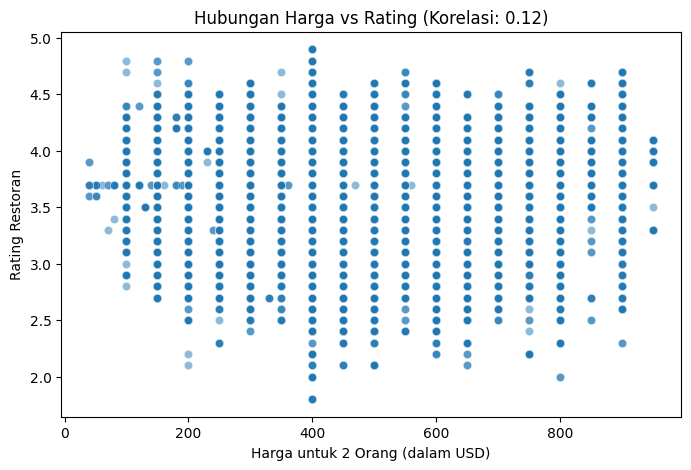

In [15]:
# Pastikan harga dalam format numerik
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].astype(str).str.replace(',', '').astype(float)

# Pastikan rating dalam format numerik
df['rate'] = df['rate'].astype(str).str.extract(r'(\d+\.?\d*)')[0].astype(float)

# Hitung korelasi antara harga dan rating
correlation = df[['approx_cost(for two people)', 'rate']].corr().iloc[0,1]

print(f"Korelasi antara harga makanan dan rating restoran: {correlation:.2f}")

# Buat scatter plot harga vs rating
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='approx_cost(for two people)', y='rate', alpha=0.5)
plt.xlabel("Harga untuk 2 Orang (dalam USD)")
plt.ylabel("Rating Restoran")
plt.title(f"Hubungan Harga vs Rating (Korelasi: {correlation:.2f})")
plt.show()


Scatterplot ini menunjukkan hubungan antara harga makanan dan ulasan restoran. Sumbu x memiliki harga makanan 2 orang di USD, sedangkan sumbu y menunjukkan peringkat untuk  restoran antara 1 dan 5 bintang.

Berdasarkan hasil analisis, kami menemukan bahwa korelasi antara harga pangan dan peringkat restoran adalah **0,12**, menunjukkan hubungan yang sangat lemah. Berarti harga makanan restoran dengan harga lebih mahal tidak selalu memiliki rating yang tinggi, begitu juga sebaliknya.

Dari data tambahan, beberapa makanan dengan harga tertinggi (900-950 USD) ditemukan di restoran seperti Bathinda Dine (Hariyali Kebab, Dahi Ke Sholey), Truffles (Chicken Paprika), dan Rajdhani Thali Restaurant (Rajdhani Thali, Sweet Dal). Namun, scatterplot menunjukkan bahwa peringkat restoran yang tinggi masih berubah. Ini menunjukkan bahwa faktor -faktor lain seperti kualitas makanan restoran, layanan, lokasi, dan popularitas dapat memengaruhi ulasan lebih dari harga. Secara keseluruhan, harga bukan faktor utama dalam menentukan kepuasan pelanggan berdasarkan peringkat yang ditentukan.

3. Analisis Jenis Restoran dan Kategori Makanan: Makanan khas daerah mana yang lebih populer?

In [ ]:
# Kelompokkan berdasarkan jenis restoran dan dapatkan masakan yang paling sering disajikan
restaurant_cuisine = df.groupby('rest_type')['cuisines'].apply(lambda x: x.mode()[0])

print(restaurant_cuisine.head(10))

rest_type
Bakery                                   Bakery, Desserts
Bakery, Beverage Shop           Bakery, Juices, Fast Food
Bakery, Cafe              Bakery, Cafe, Italian, Desserts
Bakery, Dessert Parlor                   Bakery, Desserts
Bakery, Food Court                                 Bakery
Bakery, Kiosk                            Bakery, Desserts
Bakery, Quick Bites                     Bakery, Fast Food
Bakery, Sweet Shop                         Bakery, Mithai
Bar                                           Finger Food
Bar, Cafe                               Continental, Cafe
Name: cuisines, dtype: object


C:\Users\I.M\AppData\Local\Temp\ipykernel_9144\1973501077.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cuisines['Count'], y=top_cuisines['Cuisine'], palette="magma")


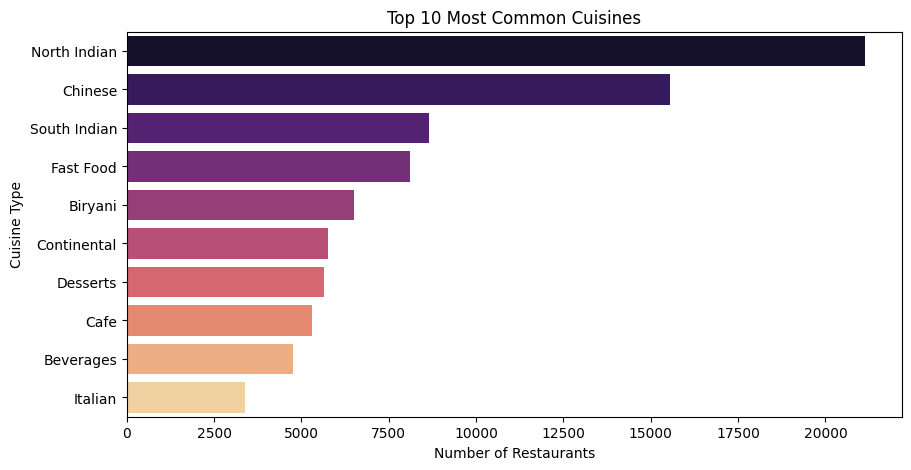

In [ ]:
# Hapus nilai kosong dalam 'cuisines'
df_cuisines = df.dropna(subset=['cuisines'])

# Pisahkan beberapa cuisines ke dalam daftar & hitung kemunculannya
all_cuisines = ', '.join(df_cuisines['cuisines']).split(', ')
cuisine_counts = Counter(all_cuisines)

# Dapatkan 10 teratas cuisines
top_cuisines = pd.DataFrame(cuisine_counts.most_common(10), columns=['Cuisine', 'Count'])

# Plot top cuisines
plt.figure(figsize=(10,5))
sns.barplot(x=top_cuisines['Count'], y=top_cuisines['Cuisine'], palette="magma")
plt.xlabel("Number of Restaurants")
plt.ylabel("Cuisine Type")
plt.title("Top 10 Most Common Cuisines")
plt.show()

Berdasarkan data jenis makanan yang paling umum di restoran, **masakan North Indian** menjadi yang paling dominan, diikuti oleh **Chinese dan South Indian**. Hal ini mencerminkan preferensi konsumen terhadap makanan tradisional dan hidangan populer yang memiliki cita rasa kuat. Selain itu, **makanan cepat saji (Fast Food) dan Biryani** juga termasuk dalam kategori yang banyak disajikan, menunjukkan permintaan tinggi terhadap makanan praktis dan kaya rasa. Jenis makanan seperti **Desserts, Cafe, dan Beverages** juga cukup umum, yang mencerminkan adanya minat konsumen terhadap makanan ringan dan tempat nongkrong.  

Sementara itu, dari segi **jenis restoran**, terdapat berbagai kombinasi layanan yang ditawarkan. **Toko roti (Bakery)** sering dikombinasikan dengan **Desserts, Cafe, atau Fast Food**, menandakan bahwa toko roti tidak hanya menjual roti tetapi juga menawarkan variasi makanan lainnya untuk menarik lebih banyak pelanggan. Selain itu, terdapat restoran **Bar dan Cafe** yang lebih berfokus pada makanan seperti **Continental dan Finger Food**, yang umumnya lebih diminati oleh pelanggan yang mencari pengalaman bersantap santai atau minuman ringan.  

4. Analisis Lokasi dan Popularitas Restoran: Apakah banyak restoran juga berarti kualitasnya baik?

C:\Users\I.M\AppData\Local\Temp\ipykernel_9144\3179515963.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=location_counts.values, y=location_counts.index, palette="crest")
C:\Users\I.M\AppData\Local\Temp\ipykernel_9144\3179515963.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_locations.values, y=top_locations.index, palette="magma")


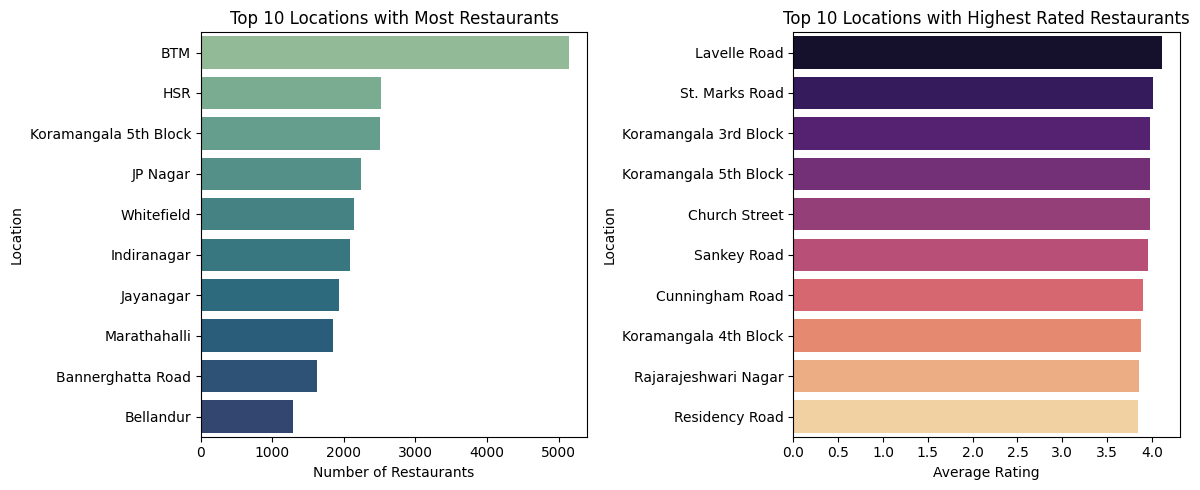

In [ ]:
# Hitung restaurants per location
location_counts = df['location'].value_counts().head(10)

# Temukan lokasi dengan peringkat rata-rata ratings
top_locations = df.groupby('location')['rate'].mean().sort_values(ascending=False).head(10)

# Plot hasilnya
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.barplot(x=location_counts.values, y=location_counts.index, palette="crest")
plt.xlabel("Number of Restaurants")
plt.ylabel("Location")
plt.title("Top 10 Locations with Most Restaurants")

plt.subplot(1,2,2)
sns.barplot(x=top_locations.values, y=top_locations.index, palette="magma")
plt.xlabel("Average Rating")
plt.ylabel("Location")
plt.title("Top 10 Locations with Highest Rated Restaurants")

plt.tight_layout()
plt.show()


Berdasarkan visualisasi data, terdapat perbedaan antara lokasi dengan jumlah restoran terbanyak dan lokasi dengan restoran berperingkat tertinggi. Lokasi dengan jumlah restoran terbanyak didominasi oleh **BTM, HSR, dan Koramangala 5th Block**, yang menunjukkan bahwa daerah ini memiliki permintaan tinggi terhadap restoran, baik dari penduduk lokal maupun wisatawan. Namun, menariknya, lokasi dengan jumlah restoran terbanyak tidak selalu memiliki rating tertinggi. Lokasi dengan restoran berperingkat tertinggi ditemukan di **Lavelle Road, St. Marks Road, dan Koramangala 3rd Block**, yang cenderung lebih eksklusif dan memiliki standar layanan serta makanan yang lebih baik. Hal ini menunjukkan bahwa kepadatan restoran di suatu lokasi tidak selalu berbanding lurus dengan kualitasnya. Lokasi dengan banyak restoran mungkin lebih kompetitif dan beragam, sementara lokasi dengan rating tinggi sering kali menawarkan pengalaman makan yang lebih premium. Analisis ini dapat membantu pelanggan dalam memilih restoran berdasarkan lokasi dan kualitas layanan, serta memberikan wawasan bagi pemilik usaha dalam menentukan lokasi strategis untuk membuka restoran baru.

5.	Analisis Online Delivery dan Booking: Lebih baik reservasi online atau take-away?

In [ ]:
# Ubah 'rate' menjadi numerik
df['rate'] = df['rate'].astype(str).str.extract(r'(\d+\.?\d*)')[0].astype(float)

# Kelompokkan berdasarkan 'online_order' & hitung jumlah total + peringkat rata-rata
online_order_stats = df.groupby('online_order')['rate'].agg(['count', 'mean'])
online_order_stats.columns = ['Total Restaurants', 'Average Rating']

# Kelompokkan berdasarkan 'book_table' & hitung jumlah total + peringkat rata-rata
book_table_stats = df.groupby('book_table')['rate'].agg(['count', 'mean'])
book_table_stats.columns = ['Total Restaurants', 'Average Rating']

# Cetak hasil
print("📌 Online Orders - Total Restaurants & Average Rating")
print(online_order_stats, "\n")

print("📌 Table Bookings - Total Restaurants & Average Rating")
print(book_table_stats)

📌 Online Orders - Total Restaurants & Average Rating
              Total Restaurants  Average Rating
online_order                                   
No                        21273        3.672181
Yes                       30444        3.720053 

📌 Table Bookings - Total Restaurants & Average Rating
            Total Restaurants  Average Rating
book_table                                   
No                      45268        3.638656
Yes                      6449        4.133494


C:\Users\I.M\AppData\Local\Temp\ipykernel_9144\3745396209.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=online_order_ratings.index, y=online_order_ratings.values, palette=["#FF9999", "#66B2FF"])


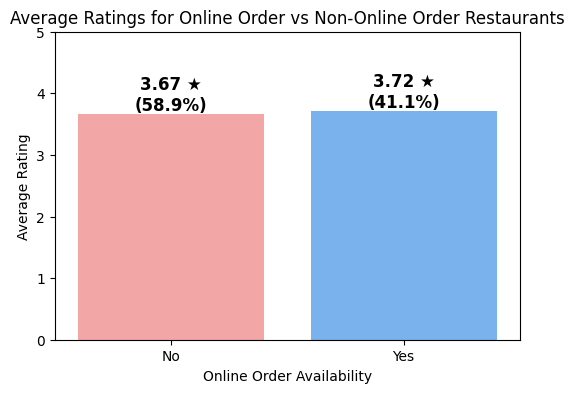

In [ ]:
# Ubah 'rate' menjadi numerik
df['rate'] = df['rate'].astype(str).str.extract(r'(\d+\.?\d*)')[0].astype(float)

# Kelompokkan berdasarkan 'online_order' & hitung peringkat rata-rata
online_order_ratings = df.groupby('online_order')['rate'].mean()

# Hitung persentase restoran di setiap kategori
order_counts = df['online_order'].value_counts(normalize=True) * 100  # Convert to percentage

# Plot
plt.figure(figsize=(6,4))
ax = sns.barplot(x=online_order_ratings.index, y=online_order_ratings.values, palette=["#FF9999", "#66B2FF"])

# Beri anotasi pada bar nilai
for i, (p, rating) in enumerate(zip(order_counts, online_order_ratings.values)):
    ax.text(i, rating + 0.05, f"{rating:.2f} ★\n({p:.1f}%)", 
            ha='center', fontsize=12, fontweight='bold')

# Label & Judul
plt.xlabel("Online Order Availability")
plt.ylabel("Average Rating")
plt.title("Average Ratings for Online Order vs Non-Online Order Restaurants")
plt.ylim(0, 5)  # Pastikan sumbu y tetap berada dalam rentang nilai

# # Cetak Plot
plt.show()

Restoran yang menerima **pesanan online (online order)** memiliki **rating rata-rata lebih tinggi (3.72)** dibandingkan restoran yang tidak menerima pesanan online (3.67). Namun, dari segi jumlah restoran, lebih banyak restoran yang **tidak menyediakan layanan pemesanan online (58.9%)**, dibandingkan dengan yang menerima pemesanan online (41.1%). Hal ini menunjukkan bahwa meskipun layanan pemesanan online dapat meningkatkan pengalaman pelanggan, masih banyak restoran yang belum mengadopsinya.  

Sementara itu, dalam hal **reservasi meja (table booking)**, terdapat perbedaan yang lebih mencolok. Restoran yang menerima reservasi meja memiliki **rating rata-rata yang jauh lebih tinggi (4.13)** dibandingkan yang tidak menerima reservasi (3.64). Namun, jumlah restoran yang menyediakan layanan reservasi jauh lebih sedikit (hanya sekitar 6,449 restoran) dibandingkan yang tidak menyediakan layanan ini (45,268 restoran). Ini menunjukkan bahwa restoran yang menawarkan reservasi cenderung lebih eksklusif atau memiliki layanan yang lebih baik, sehingga mendapatkan rating yang lebih tinggi dari pelanggan.  

Secara keseluruhan, meskipun layanan pemesanan online dan reservasi meja berkontribusi terhadap pengalaman pelanggan yang lebih baik, tidak semua restoran mengadopsinya. Restoran dengan reservasi meja memiliki peningkatan rating yang lebih signifikan dibandingkan dengan restoran yang menerima pemesanan online, yang menunjukkan bahwa pelanggan mungkin lebih menghargai pengalaman bersantap yang lebih terstruktur dan eksklusif.